In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
%matplotlib inline

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
good_url_df = pd.read_csv("data_legitimate_36400.csv")
bad_url_df = pd.read_csv("data_phishing_37175.csv")

col_names = ["index", "url"]
good_url_df.columns = col_names
bad_url_df.columns = col_names

good_url_df["is_phishing"] = good_url_df["url"].apply(lambda x: "no")
bad_url_df["is_phishing"] = bad_url_df["url"].apply(lambda x: "yes")

df = pd.concat([good_url_df, bad_url_df])
df = df.drop("index", axis=1)

df = df.sample(frac=1).reset_index(drop=True) # shuffle rows

print("df shape:", df.shape)
print(df.info())
df

df shape: (73575, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73575 entries, 0 to 73574
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          73575 non-null  object
 1   is_phishing  73575 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


,url,is_phishing
0,http://uniformandmore.com/skin/bitcoin/bitcoin/,yes
1,https://zf.fm/,no
2,http://jaaeza.com/dribrahim/document-shared446...,yes
3,https://www.w3schools.com/JSREF/jsref_forEach.asp,no
4,http://hallmarkteam.com/uuu/Ed/Ed/,yes
...,...,...
73570,http://mariage-photographe.fr/securefolder/,yes
73571,http://medicareindiana.com/wp-includes/js/auto...,yes
73572,http://www.newmazda.info/wp-includes/Text/ipad/,yes
73573,http://www.alsultanah.com/login.jsp.htm?tracel...,yes


is_phishing
yes    37175
no     36400
Name: count, dtype: int64


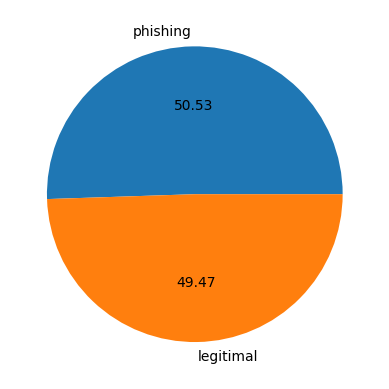

In [62]:
print(df["is_phishing"].value_counts())
pyp.pie(df["is_phishing"].value_counts(), labels = ["phishing", "legitimal"], autopct = "%0.2f")
pyp.show()

In [55]:
df.isnull().sum()

url            0
is_phishing    0
dtype: int64

In [79]:
df["len_url"] = df["url"].apply(lambda x: len(x))
df["contains_subscribe"] = df["url"].apply(lambda x: 1 if "subscribe" in x else 0)
df["contains_hash"] = df["url"].apply(lambda x: 1 if "#" in x else 0)
df["num_digits"] = df["url"].apply(lambda x: len("".join(_ for _ in x if _.isdigit())))
df["non_https"] = df["url"].apply(lambda x: 0 if "https" in x else 1)
df["num_words"] = df["url"].apply(lambda x: len(x.split('/')))
df

,url,is_phishing,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,http://uniformandmore.com/skin/bitcoin/bitcoin/,yes,47,0,0,0,1,7
1,https://zf.fm/,no,14,0,0,0,0,4
2,http://jaaeza.com/dribrahim/document-shared446...,yes,60,0,0,3,1,7
3,https://www.w3schools.com/JSREF/jsref_forEach.asp,no,49,0,0,1,0,5
4,http://hallmarkteam.com/uuu/Ed/Ed/,yes,34,0,0,0,1,7
...,...,...,...,...,...,...,...,...
73570,http://mariage-photographe.fr/securefolder/,yes,43,0,0,0,1,5
73571,http://medicareindiana.com/wp-includes/js/auto...,yes,101,0,0,12,1,8
73572,http://www.newmazda.info/wp-includes/Text/ipad/,yes,47,0,0,0,1,7
73573,http://www.alsultanah.com/login.jsp.htm?tracel...,yes,202,0,0,38,1,4


In [80]:
import plotly.express as px
fig = px.histogram(df, x="len_url", color="is_phishing")
fig.update_layout(title= "URLs length by Phishing / Legitimate", xaxis_title="URL length", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [69]:
fig = px.histogram(df, x="num_digits", color="is_phishing")
fig.update_layout(title= "URLs Digits Counts by Phishing / Phishing", xaxis_title="Number of digits", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [81]:
fig = px.histogram(df, x="num_words", color="is_phishing")
fig.update_layout(title= "URLs Number of Words by Phishing / Phishing", xaxis_title="Number of Words", yaxis_title="", plot_bgcolor="#fff", showlegend=False)
fig.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73575 entries, 0 to 73574
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 73575 non-null  object
 1   is_phishing         73575 non-null  object
 2   len_url             73575 non-null  int64 
 3   contains_subscribe  73575 non-null  int64 
 4   contains_hash       73575 non-null  int64 
 5   num_digits          73575 non-null  int64 
 6   non_https           73575 non-null  int64 
 7   num_words           73575 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 4.5+ MB


In [83]:
col_names = ["is_phishing", "len_url", "contains_subscribe", "contains_hash", "num_digits", "non_https", "num_words"]
for col in col_names:
    print(df[col].value_counts())

is_phishing
yes    37175
no     36400
Name: count, dtype: int64
len_url
43      1810
45      1593
42      1528
44      1497
50      1450
        ... 
449        1
1154       1
526        1
351        1
331        1
Name: count, Length: 360, dtype: int64
contains_subscribe
0    73550
1       25
Name: count, dtype: int64
contains_hash
0    73270
1      305
Name: count, dtype: int64
num_digits
0      42669
1       4744
2       3240
4       2896
6       2308
       ...  
142        1
181        1
155        1
120        1
162        1
Name: count, Length: 137, dtype: int64
non_https
1    59247
0    14328
Name: count, dtype: int64
num_words
5     20987
6     18046
7     11017
4      9867
8      6533
9      3268
10     1856
11      962
12      250
1       182
15      173
13      161
14       88
3        77
16       29
17       26
28       18
19       15
18        5
27        4
2         2
25        2
20        2
34        1
31        1
21        1
30        1
35        1
Name: count, dtype: 

In [84]:
df["is_phishing"].value_counts()

is_phishing
yes    37175
no     36400
Name: count, dtype: int64

In [85]:
df.isnull().sum()

url                   0
is_phishing           0
len_url               0
contains_subscribe    0
contains_hash         0
num_digits            0
non_https             0
num_words             0
dtype: int64

In [88]:
X = df.drop(["is_phishing", "url"], axis=1)
y = df["is_phishing"]
X

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,47,0,0,0,1,7
1,14,0,0,0,0,4
2,60,0,0,3,1,7
3,49,0,0,1,0,5
4,34,0,0,0,1,7
...,...,...,...,...,...,...
73570,43,0,0,0,1,5
73571,101,0,0,12,1,8
73572,47,0,0,0,1,7
73573,202,0,0,38,1,4


In [89]:
y

0        yes
1         no
2        yes
3         no
4        yes
        ... 
73570    yes
73571    yes
73572    yes
73573    yes
73574    yes
Name: is_phishing, Length: 73575, dtype: object

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
X_train.shape, X_test.shape

((49295, 6), (24280, 6))

In [92]:
X_train.dtypes

len_url               int64
contains_subscribe    int64
contains_hash         int64
num_digits            int64
non_https             int64
num_words             int64
dtype: object

In [93]:
X_train.head()

,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
46120,67,0,0,0,1,8
5733,42,0,0,0,1,5
36661,50,0,0,0,1,5
69540,46,0,0,0,1,5
49693,72,0,0,6,0,6


In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8269


In [101]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

y_pred = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8269


In [107]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [108]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

len_url               0.279390
num_words             0.270793
non_https             0.241443
num_digits            0.206875
contains_hash         0.000945
contains_subscribe    0.000554
dtype: float64

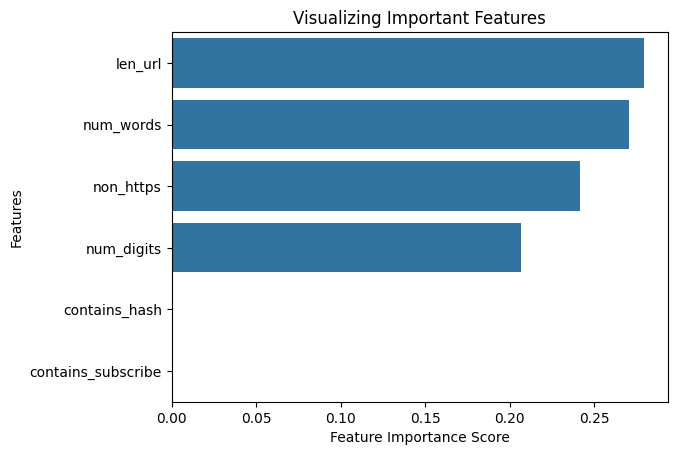

In [110]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

In [115]:
X = df.drop(['url', 'is_phishing', 'contains_hash'], axis=1)
y = df['is_phishing']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

y_pred = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accurancy score with 100 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accurancy score with 10 decision-trees: 0.8263
